# Ejercicio 7

In [114]:
import numpy as np

def poisson_rec(lam, i, p_i):
    return p_i * lam / i if i > 0 else np.exp(-lam)

def poisson(lam, i):
    last = 0
    acc = []
    for k in range(i+1):
        last = poisson_rec(lam, k, last)
        acc.append(last)
    return acc


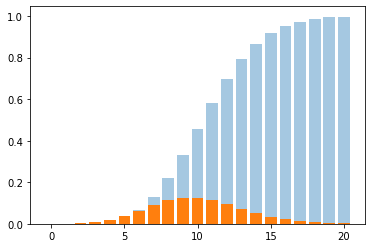

In [115]:
import matplotlib.pyplot as plt

def acumulada(probs):
    return [ sum(probs[:i]) for i in range(len(probs))]

lam = 10
n = 20
probs = poisson(lam, n)

plt.bar(np.arange(n+1), acumulada(probs), alpha=0.4)
plt.bar(np.arange(n+1), probs)
plt.show()

## Variables

In [116]:
import random as rnd 

def poisson_tinv(lam):
    u = rnd.random()
    i, p = 0, np.exp(-lam)
    f = p
    while u >= f:
        i += 1
        p *= lam / i
        f += p
    return i

def poisson_mk2(lam):
    p = np.exp(-lam)
    f = p
    for j in range(1, int(lam) + 1):
        p *= lam / j
        f += p
    u = rnd.random()
    if u >= f:
        j = int(lam) + 1
        while u >= f:
            p *= lam/ j
            f += p
            j += 1
        return j - 1
    else:
        j = int(lam)
        while u < f:
            f -= p
            p *= j / lam
            j -= 1
        return j + 1


## Auxiliares

In [117]:
import time 
import matplotlib.pyplot as plt
import numpy as np

def get_probs(g, nsim, *args):
    rnd.seed(1000)
    acc = {}

    start = time.perf_counter()
    for _ in range(nsim):
        r = g(*args)
        acc[r] = 1 + acc.get(r, 0)

    end = time.perf_counter()

    perf = end - start
    acc = { k:v/nsim for k, v in acc.items() }
    acc = dict(sorted(acc.items()))
    return acc, perf

def plot_probs(vars, nsim):
    i = -0.5
    for n, g, v in vars:
        print(75*'-')
        print(n)
        
        acc, perf = get_probs(g, nsim, *v)
        
        print(f'Got:\t {acc}\n' + 
            f'Perf:\t {perf:.3}ms'
            )
        
        x_axis = list(map(lambda x: x + i*0.5, acc.keys()))
        y_axis = acc.values()
        plt.bar(x_axis,y_axis, 0.5, label=n)
        
        i += 1

def plot_expected(probs):
    x_expected = []
    y_expected = []
    for i in range(len(probs)):
        for j in [-1,1]:
            x_expected.append(i+0.5*j)
            y_expected.append(probs[i])
            
    plt.plot(x_expected, y_expected, color='red', label='Expected')
    return x_expected, y_expected

## Evaluacion

---------------------------------------------------------------------------
Invertida
Got:	 {1: 0.0002, 2: 0.0027, 3: 0.0081, 4: 0.0209, 5: 0.0396, 6: 0.0641, 7: 0.0877, 8: 0.1117, 9: 0.1231, 10: 0.1256, 11: 0.1097, 12: 0.1026, 13: 0.0699, 14: 0.052, 15: 0.0345, 16: 0.0193, 17: 0.0139, 18: 0.007, 19: 0.0041, 20: 0.0019, 21: 0.0009, 22: 0.0003, 23: 0.0002}
Perf:	 0.0427ms
---------------------------------------------------------------------------
Mejorada 
Got:	 {1: 0.0002, 2: 0.0027, 3: 0.0081, 4: 0.0209, 5: 0.0396, 6: 0.0641, 7: 0.0877, 8: 0.1117, 9: 0.1231, 10: 0.1256, 11: 0.1097, 12: 0.1026, 13: 0.0699, 14: 0.052, 15: 0.0345, 16: 0.0193, 17: 0.0139, 18: 0.007, 19: 0.0041, 20: 0.0019, 21: 0.0009, 22: 0.0003, 23: 0.0002}
Perf:	 0.0406ms


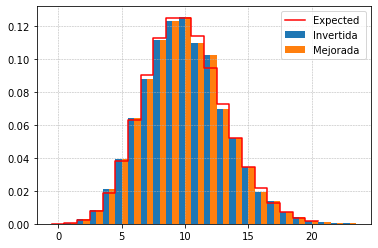

In [120]:
vars = [
    ('Invertida', poisson_tinv, [10]),
    ('Mejorada ', poisson_mk2, [10])
]

plot_probs(vars, 10_000)

plot_expected(poisson(10,20))

plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

## Resolucion